In [3]:
import numpy as np
from astropy import units as u
from astropy.io import fits

import specutils

first = lambda x:next(iter(x))

%matplotlib inline
from matplotlib import style, pyplot as plt

In [2]:
stemp = fits.open('templates/deimos-021507.fits')[0]

stemp.header

SIMPLE  =                    T / Written by IDL:  Thu Mar 15 14:07:52 2007      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                 7200 /                                                
NAXIS2  =                   16 /                                                
EXTEND  =                    T /Extensions may be present                       
DATE    = '2007-03-15'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
COEFF0  =              3.80650 /                                                
COEFF1  =          2.00000E-05 /                                                
NAME0   = 'K0III   '           /                                                
NAME1   = 'F8III   '        

In [6]:
wl = 10**(stemp.header['COEFF0'] + np.arange(stemp.data.shape[1])*stemp.header['COEFF1'])*u.angstrom

In [15]:
specs = {}
for i, val in enumerate(stemp.data):
        specs[stemp.header[f'NAME{i}']] = specutils.Spectrum1D(spectral_axis=wl, flux=val*u.dimensionless_unscaled)

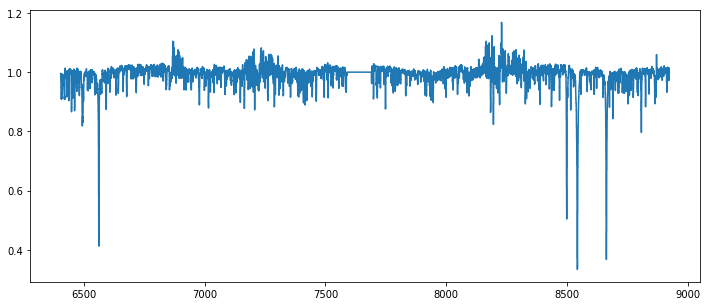

In [29]:
plt.figure(figsize=(12, 5))
s = specs['G5II']
plt.step(s.wavelength, s.flux)